# Matriz de semejanza

Pero que pasa si queremos incluir más variables dentro del análisis? Quizá la información que aporta un análisis a partir de los iconos de las muestras no es suficiente y queremos agregar un poco más de datos al análisis. Por ejemplo tratar de entender que tan similares son dos muestras entre si... o quizá si extendemos el análisis a muchas muestras.

## Algunos conceptos que serán útiles 

### Bag of features
<a href="https://towardsdatascience.com/bag-of-visual-words-in-a-nutshell-9ceea97ce0fb?gi=47d61e741087"><img src="https://miro.medium.com/max/377/1*yDysYXCrt6ONX6bAY8BIvw.png" alt="1" border="0"></a>

En el caso de análisis de malware podemos utilizar algunas características como:
#### Secuencias de instrucciones
#### DLLs importadas
#### Ejecuciones dinámicas
#### Análisis semántico sobre el nombre del archivo
#### Strings dentro del archivo

Esta última opción es la que estaremos explorando a continuación, para llegar hasta una matriz de similitud donde podremos evaluar rápidamente si en un grupo de muestras dado tenemos algunas que puedan tener las suficientes características en común como para considerarlas similares

In [14]:
#!/usr/bin/python

import pandas as pd
import os
import itertools
import seaborn as sns

muestras = [] 
atributos_muestras = dict()

columnas=[]

Luego de importar las librerías, se mapean las muestras que van a ser susceptibles de análisis

In [ ]:
for root, carpetas, rutas in os.walk('/Agrega la ruta donde están las muestras'):
        
    for ubicacion in rutas:
        
        ruta_completa = os.ubicacion.join(root,ubicacion)
                
        muestras.append(ruta_completa)

En este caso vamos a extraer todos los strings de cada uno de los archivos, para armar lo que podríamos llamar un *corpus*que nos permita hacer el análisis. Si bien no se trata de un análisis semántico como tal, se toman algunas ideas acerca del funcionamiento de este tipo de metodologías.

In [9]:
for sample in muestras:
    
    strings = os.popen("strings '{0}'".format(sample)).read()
    strings = set(strings.split("\n"))
     
    atributos_muestras[sample] = strings

    name_node=sample.split('/')[-2][:3]+'_'+sample.split('/')[-1][:40]
    columnas.append(name_node)
    
total_muestras=len(columnas) 

Si bien en este caso utilizamos el *viejo conocido* `strings` por su rapidez, es cierto que nos puede traer strings que dependiendo del análisis podrían entorpecer el análisis.
Para lograr un análisis más fino podríamos utilizar [**LOTS**](https://github.com/eset-la/Lord-Of-The-Strings) una herramienta que estamos desarrollando en el equipo de ESET, y que si bien en este momento es un poco *costoso* en cuanto al tiempo que consume nos puede brindar resultados más precisos

Ahora para evaluar la semejanza entre cada una de las muestras, vamos a valernos del concepto de **distancia**. Y si bien hay diferentes formas de calcularlo, por practicidad vamos a utilizar el coeficiente de Jaccard.
<a href="https://www.r-bloggers.com/2018/10/how-to-calculate-jaccard-coefficients-in-displayr-using-r/"><img src="https://www.displayr.com/wp-content/uploads/2018/09/Jaccard-formula.png" alt="bipartite2" border="0"></a>

In [10]:
vector_jaccard=[]

for malware1,malware2 in itertools.product(muestras,repeat=2):
     

    interseccion = atributos_muestras[malware1].intersection(atributos_muestras[malware2])
    elementos_comun = float(len(intersection))
    
    union = atributos_muestras[malware1].union(atributos_muestras[malware2])
    total_elementos = float(len(union))
    
    indice_jaccard = elementos_comun / total_elementos
    
    vector_jaccard.append(indice_jaccard)   

Una vez que tenemos este vector simplemente vamos a construir una matriz cuadrada de similitud con valores entre 0 y 1

In [11]:
data = pd.DataFrame(columns=columnas)
datos = []
count=0

for indice in vector_jaccard:
    
    datos.append(indice)
    count+=1
    
    if count==total_muestras:
        count=0
        data.loc[len(data)]=datos
        datos = [] 

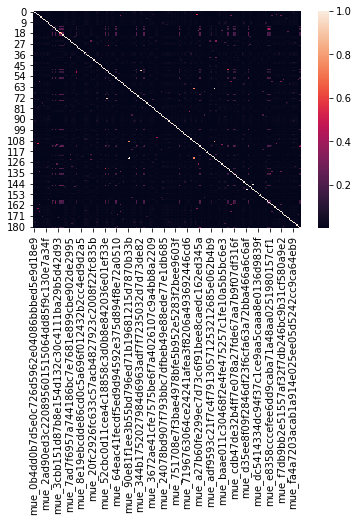

In [12]:
sns.heatmap(data)